In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('ds/sonar data.csv')

In [3]:
ds.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc=StandardScaler()

In [11]:
nd=sc.fit_transform(ds.drop('R',axis=1))

In [12]:
from sklearn.model_selection import train_test_split


In [14]:
y=ds['R']

In [15]:
xtr,xt,ytr,yt=train_test_split(nd,y,test_size=0.3,random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred=knn.predict(xt)

C:\Users\Arun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(classification_report(yt,pred))

              precision    recall  f1-score   support

           M       0.86      0.83      0.85        36
           R       0.79      0.81      0.80        27

    accuracy                           0.83        63
   macro avg       0.82      0.82      0.82        63
weighted avg       0.83      0.83      0.83        63



In [34]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,ytr)
    pred=knn.predict(xt)
    error.append(np.mean(pred!=yt))
    

C:\Users\Arun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Arun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

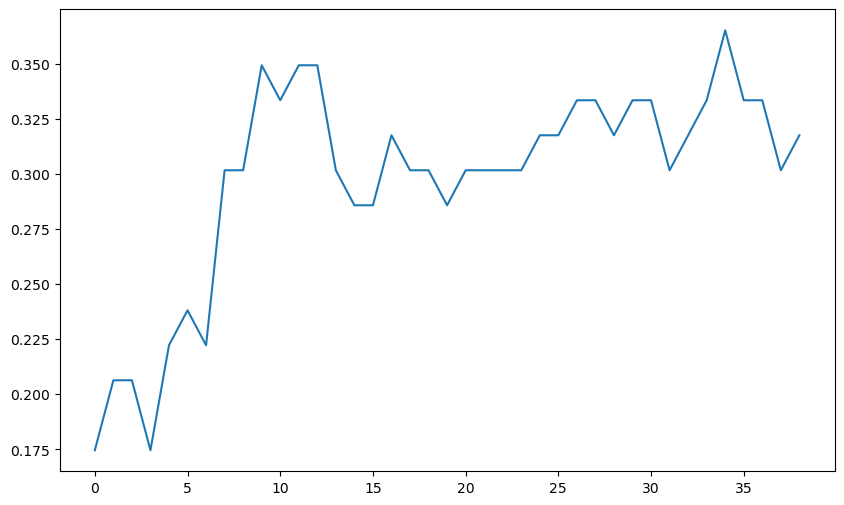

In [37]:
plt.figure(figsize=(10,6))
plt.plot(error)